In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Loading the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [3]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#func to fit the naive bayes model
def fit_naive_bayes(X, y):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)

    # init the mean, variance, and prior probabilities
    mean = np.zeros((n_classes, n_features), dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    priors = np.zeros(n_classes, dtype=np.float64)

    # Calculate mean, variance, and prior probabilities
    for c in classes:
        X_c = X[y == c]
        mean[c, :] = X_c.mean(axis=0)
        var[c, :] = X_c.var(axis=0)
        priors[c] = X_c.shape[0] / float(n_samples)

    return mean, var, priors, classes

In [16]:
# Function to calculate the probability density function
def pdf(class_idx, x, mean, var):
    numerator = np.exp(-((x - mean[class_idx]) ** 2) / (2 * var[class_idx]))
    denominator = np.sqrt(2 * np.pi * var[class_idx])
    return numerator / denominator

In [17]:
# Function to predict the class for a given sample
def predict(sample, mean, var, priors, classes):
    posteriors = []
    for i in range(len(classes)):
        prior = np.log(priors[i])
        likelihood = np.sum(np.log(pdf(i, sample, mean, var)))
        posterior = prior + likelihood
        posteriors.append(posterior)
    return classes[np.argmax(posteriors)]

In [18]:
# Function to make predictions for the test set
def predict_all(X, mean, var, priors, classes):
    return np.array([predict(x, mean, var, priors, classes) for x in X])

In [19]:
# fit model
mean, var, priors, classes = fit_naive_bayes(X_train, y_train)

In [20]:
# Make preds on the test set
y_pred = predict_all(X_test, mean, var, priors, classes)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [22]:
# build the confusion matrix
cm = confusion_matrix(y_test, y_pred)

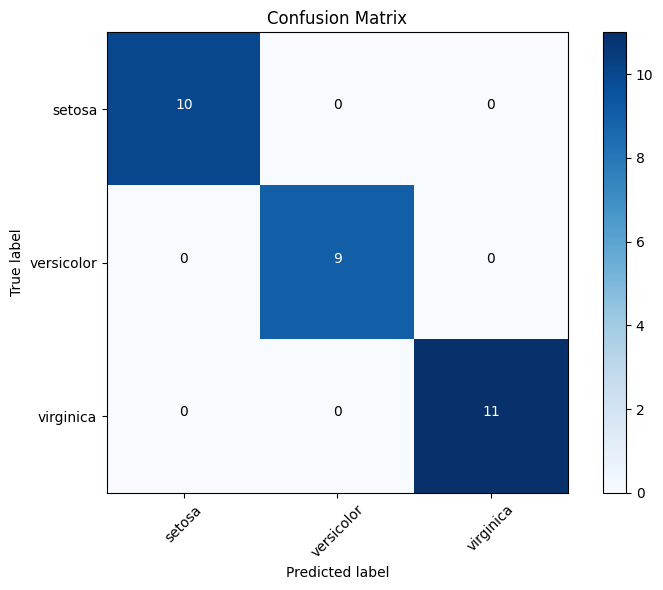

In [23]:
# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()